<a href="https://colab.research.google.com/github/lmendezotero/Postgraduate-Project/blob/master/House%20Prices%20Prediction/House%20Prices%20Prediction%20-%20Lorena(V12).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# House Prices Prediction (V1)

## ** Notebook Content **

- 1. Introduction
- 2. Previous Analysis
    - 2.1 Importing the required packages
    - 2.2 Loading the dataset
    - 2.3 'SalePrice' distribution analysis
- 3. Data Pre-processing 
    - 3.1
    - 2.3 Missing data analysis
    - 2.4 Feature Scaling (values normalization)
    - 2.5 Split the data into training and tes
    - 2.6 Save the changes
- 4. Building the Prediction Models

## 1 Introduction 

The goal of this project is to **find the best fitting model for predicting the house prices of the city of Ames**, using advanced regressions techniques, such as random forest or gradient boosting.

To do this, we will use a data set composed of 2930 observations and 80 variables (23 nominal, 23 ordinal, 14 discrete and 20 continous), which describes the sale of individual residential property in Ames from 2006 to 2010. The data has been provided by the Ames City Assesor's Office.

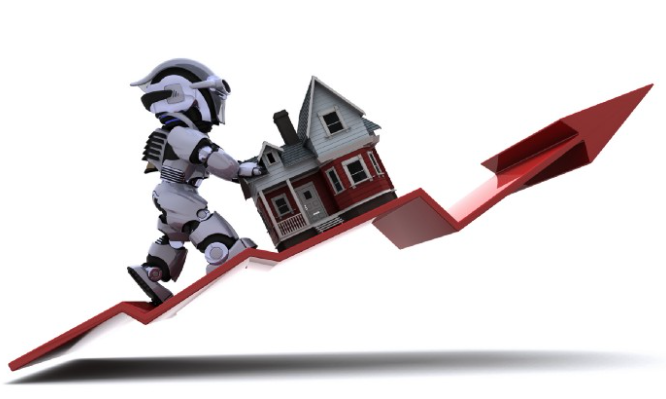

In [ ]:
from IPython.core.display import Image
Image("HOUSE_PRICE_PREDICTION.PNG")

## 2 Previous Analysis 

### 2.1 Importing the requiered packages 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### 2.2 Loading the dataset 

#### 2.2.1 Checking the training set 

In [ ]:
#loading the training set
df_train = pd.read_csv('train.csv')
df_train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [ ]:
#check the shape of the data
df_train.shape

(1460, 81)

In [ ]:
#check the type of data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

__Important!__
After checking the information of the dataset, we realised that the variable *SalePrice* is the dependent variable (the value that we want to predict with our model).

#### 2.2.2 Checking the test set 

In [ ]:
#loading the test set
df_test = pd.read_csv('test.csv')
df_test.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [ ]:
#check the shape of the data
df_test.shape

(1459, 80)

In [ ]:
#check the type of data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

### 2.3 'SalePrice' distribution analysis

Firstly, we need to check the SalePrice column to clearly understand the distibution of prices.

We are going to analyze if the dependent variable (SalePrice) follows a normal distribution.

In [ ]:
#check the  main statistics of the dependent variable 
df_train['SalePrice'].describe() 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Keeping in mind the statistics, the mean price is around 180k USD. The most expensive house is for 775k USD and the cheapest is only for 34,9k USD. In addition, the 50% quantile lies at 163k USD.

Let's build a histogram to review the distribution of the house prices.

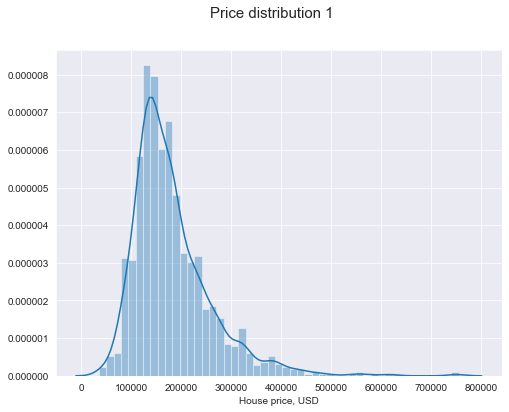

In [ ]:
sns.set_style('darkgrid')

fig,ax = plt.subplots(1,1,figsize=(8,6))
sns.distplot(df_train['SalePrice'], ax=ax)

ax.set_xlabel('House price, USD')
plt.suptitle('Price distribution 1', size=15)
plt.show()

Text(0.5, 1.0, 'SalePrice Histogram 1')

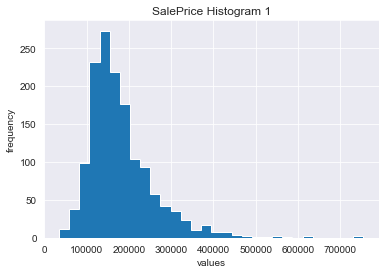

In [ ]:
# histograma
df_train['SalePrice'].hist(normed=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('SalePrice Histogram 1')

We can see that the y_train variable does not follow a normal distribution (Gaussian distribution).

Let's check how many houses have a price higher than 500000 USD.

In [ ]:
df_train.query('SalePrice > 442567.0100000005')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
178,179,20,RL,63.0,17423,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,501837
185,186,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000
440,441,20,RL,105.0,15431,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,555000
527,528,60,RL,67.0,14948,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,446261
591,592,60,RL,97.0,13478,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,ConLI,Normal,451950
691,692,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
769,770,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000
798,799,60,RL,104.0,13518,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2009,New,Partial,485000
803,804,60,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,New,Partial,582933
898,899,20,RL,100.0,12919,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,New,Partial,611657


In [ ]:
len(df_train.query('SalePrice > 442567.0100000005'))

15

We can see that **only 15 houses have a price more than 440.000 UDS**. It seems like we can drop them as outliers.

In [ ]:
#delete the outliers values
df_train.drop([178, 185, 440, 527, 591, 691, 769, 798, 803, 898, 1046, 1169, 1182, 1243, 1373], inplace=True)

In [ ]:
#check the shape of the dataframe after deleting the outliers
df_train.shape

(1445, 81)

Now, we are going to check whether the dependent variable (y_train) follows a normal distribution after removing the outliers.

In [ ]:
#check the main statistics of the dependent variable (y_train)
df_train['SalePrice'].describe() 

count      1445.000000
mean     177082.510035
std       69614.603756
min       34900.000000
25%      129900.000000
50%      162000.000000
75%      212000.000000
max      440000.000000
Name: SalePrice, dtype: float64

Text(0.5, 1.0, 'SalePrice Histogram 2')

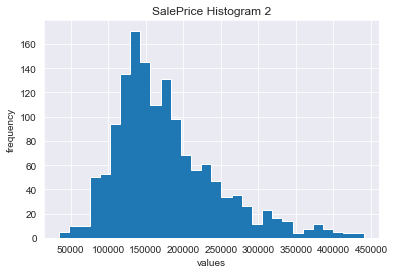

In [ ]:
# histograma
df_train['SalePrice'].hist(normed=0, histtype='stepfilled', bins=30)
plt.ylabel('frequency')
plt.xlabel('values')
plt.title('SalePrice Histogram 2')

## 3 Data pre-processing 

### 3.1 Get the Independent and Dependent variables

In [ ]:
X_train = df_train.iloc[:, :-1] #all lines, all columns except the last one
y_train = df_train.iloc[:, 80] #all lines, only the last column

In [ ]:
#check the shaape of X_train and y_train
X_train.shape, y_train.shape

((1445, 80), (1445,))

### 3.2 Merging the training and test dataframes

Let's combine two datasets (X_train and df_test) and work with the data faster.

In [ ]:
#generate the 'origin' column.
X_train['origin']= 0
df_test['origin']= 100

In [ ]:
#create the variable df_total, which is a dataframe union of df_test and df_train
df_total = pd.concat([X_train,df_test])

In [ ]:
df_total.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,origin
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,0


In [ ]:
#check the shape of df_total
df_total.shape

(2904, 81)

In [ ]:
#export the data to csv
df_total.to_csv('df_total.csv', index=False)

### 3.3 Missing data analysis

We are going to review how many null values we have in the dataset.

In [ ]:
#check how many null values there are in the dataset
df_total.isnull().sum().sum()

13905

There are a total of 13905 records with nan values. 

We are going to analyze the dimension of the dataset by columns and rows to decide what columns and rows should be rejected from the dataset.

#### a) Missings for columns

Le's check the percentage of null values per column, filtering only for those columns that have NaN values.

In [ ]:
#Creating table with "% missing"
total_missing = df_total.isnull().sum().sort_values(ascending=False)
percent = (df_total.isnull().sum()/df_total.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total_missing, percent], axis=1, keys=['Total', 'Percent'])
missing.head(34)

,Total,Percent
PoolQC,2895,0.996901
MiscFeature,2799,0.963843
Alley,2706,0.931818
Fence,2335,0.804063
FireplaceQu,1420,0.488981
LotFrontage,485,0.167011
GarageCond,159,0.054752
GarageYrBlt,159,0.054752
GarageFinish,159,0.054752
GarageQual,159,0.054752


We are going to remove those columns that have a percentage of null values higher than 48%, as they do not provide enough information to analyze.

Therefore, we are going to remove the following variables from the dataset: 'Alley', 'PoolQC', 'Fence', 'MiscFeature' and 'FireplaceQu'.

In [ ]:
#remove the MiscFeature, Fence, PoolQC and Alley variables
df_total.drop(['MiscFeature', 'Fence', 'PoolQC', 'Alley', 'FireplaceQu'], axis = 1, inplace = True)

In [ ]:
#check the shape of the training set after removing the variables 
df_total.shape

(2904, 76)

Now, we are going to replace the null values with the mean / median in the remaining numeric variables.

Remaining numerical variables to treat => LotFrontage, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, GarageYrBlt, GarageCars, GarageArea.       

In [ ]:
median_LotFrontage = df_total['LotFrontage'].median(skipna = True)
median_MasVnrArea = df_total['MasVnrArea'].median(skipna = True)
median_BsmtFinSF1 = df_total['BsmtFinSF1'].median(skipna = True)
median_BsmtFinSF2 = df_total['BsmtFinSF2'].median(skipna = True)
median_BsmtUnfSF = df_total['BsmtUnfSF'].median(skipna = True)
median_TotalBsmtSF = df_total['TotalBsmtSF'].median(skipna = True)
median_BsmtFullBath = df_total['BsmtFullBath'].median(skipna = True)
median_BsmtHalfBath = df_total['BsmtHalfBath'].median(skipna = True)
median_GarageYrBlt = df_total['GarageYrBlt'].median(skipna = True)
median_GarageCars = df_total['GarageCars'].median(skipna = True)
median_GarageArea = df_total['GarageArea'].median(skipna = True)

In [ ]:
print(median_LotFrontage, median_MasVnrArea , median_BsmtFinSF1, median_BsmtFinSF2, median_BsmtUnfSF, median_TotalBsmtSF)

68.0 0.0 368.0 0.0 467.0 988.0


In [ ]:
print(median_BsmtFullBath, median_BsmtHalfBath, median_GarageYrBlt, median_GarageCars, median_GarageArea)

0.0 0.0 1979.0 2.0 478.0


In [ ]:
df_total['MasVnrArea'].describe()

count    2882.000000
mean      100.010756
std       174.782940
min         0.000000
25%         0.000000
50%         0.000000
75%       162.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [ ]:
df_total['BsmtFinSF2'].describe()

count    2903.000000
mean       49.652773
std       169.363872
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1526.000000
Name: BsmtFinSF2, dtype: float64

In [ ]:
df_total['BsmtFullBath'].describe()

count    2902.00000
mean        0.42867
std         0.52472
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         3.00000
Name: BsmtFullBath, dtype: float64

In [ ]:
df_total['BsmtHalfBath'].describe()

count    2902.000000
mean        0.061337
std         0.245667
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: BsmtHalfBath, dtype: float64

In [ ]:
#compute the mean for the MasVnrArea, BsmtFinSF2, BsmtFullBath and BsmtHalfBath variables
mean_MasVnrArea = df_total['MasVnrArea'].mean(skipna = True)
mean_BsmtFinSF2 = df_total['BsmtFinSF2'].mean(skipna = True)
mean_BsmtFullBath = df_total['BsmtFullBath'].mean(skipna = True)
mean_BsmtHalfBath = df_total['BsmtHalfBath'].mean(skipna = True)

In [ ]:
print(mean_MasVnrArea, mean_BsmtFinSF2, mean_BsmtFullBath, mean_BsmtHalfBath)

100.01075641915337 49.652772993455045 0.4286698828394211 0.061337008959338385


In [ ]:
#replace the na/nan values by the respective median/mean
df_total['LotFrontage'] = df_total['LotFrontage'].replace(np.NaN, median_LotFrontage)
df_total['MasVnrArea'] = df_total['MasVnrArea'].replace(np.NaN, mean_MasVnrArea)
df_total['BsmtFinSF1'] = df_total['BsmtFinSF1'].replace(np.NaN, median_BsmtFinSF1)
df_total['BsmtFinSF2'] = df_total['BsmtFinSF2'].replace(np.NaN, mean_BsmtFinSF2)
df_total['BsmtUnfSF'] = df_total['BsmtUnfSF'].replace(np.NaN, median_BsmtUnfSF)
df_total['TotalBsmtSF'] = df_total['TotalBsmtSF'].replace(np.NaN, median_TotalBsmtSF)
df_total['BsmtFullBath'] = df_total['BsmtFullBath'].replace(np.NaN, mean_BsmtFullBath)
df_total['BsmtHalfBath'] = df_total['BsmtHalfBath'].replace(np.NaN, mean_BsmtHalfBath)
df_total['GarageYrBlt'] = df_total['GarageYrBlt'].replace(np.NaN, median_GarageYrBlt)
df_total['GarageCars'] = df_total['GarageCars'].replace(np.NaN, median_GarageCars)
df_total['GarageArea'] = df_total['GarageArea'].replace(np.NaN, median_GarageArea)

In [ ]:
#check null values in the treated variables
df_total['LotFrontage'].isnull().sum().sum()
df_total['MasVnrArea'].isnull().sum().sum()
df_total['BsmtFinSF1'].isnull().sum().sum()
df_total['BsmtFinSF2'].isnull().sum().sum()
df_total['BsmtUnfSF'].isnull().sum().sum()
df_total['TotalBsmtSF'].isnull().sum().sum()
df_total['BsmtFullBath'].isnull().sum().sum()
df_total['BsmtHalfBath'].isnull().sum().sum()
df_total['GarageYrBlt'].isnull().sum().sum()
df_total['GarageCars'].isnull().sum().sum()
df_total['GarageArea'].isnull().sum().sum()

0

In [ ]:
#check how many null values there are in the dataset (after cleaning the numerical variables)
df_total.isnull().sum().sum()

1074

After cleaning the numerical values, we have pending to treat  1.074 nan values.

It is important to remark that we have deleted a total of 12.831 nan values (13.905 - 1.074).

#### b) Missings for rows 

There are some rows with a lot of "NaN" values. In order to inspect it quickly, we get the total nan values for each row.

We look wich rows have more than 70% columns with "NaN" values. (i.e. with more than 12 columns empty).

In [ ]:
# To get the total number for each row
nansrows = pd.DataFrame({'total_nans':df_total.isnull().sum(axis=1)})
nansrows[nansrows['total_nans']>11].count()

total_nans    0
dtype: int64

Now, we extract the total "NaN" values for each column, to look wich columns are the "typical" empty.

In [ ]:
# Couting the total nans for each column
toplot = df_total.isna().sum()
#Ploting the total nans for column
toplot.reset_index().plot(x = 'index', kind = 'bar', figsize=(15,10), fontsize = 15)

Hola, esto es la prueba de google colab.
